<a href="https://colab.research.google.com/github/sam15252005/Ai-driven-stock-price-prediction/blob/main/Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Download stock data (e.g., Apple)
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2024-01-01')
df = df[['Close']]  # Use only closing prices

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Prepare training data
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [5]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0442
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.7478e-04
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 5.5164e-04
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 5.4794e-04
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.6403e-04
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 5.3324e-04
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.0921e-04
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 4.5247e-04
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 4.2553e-04
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 5.2021e-04


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


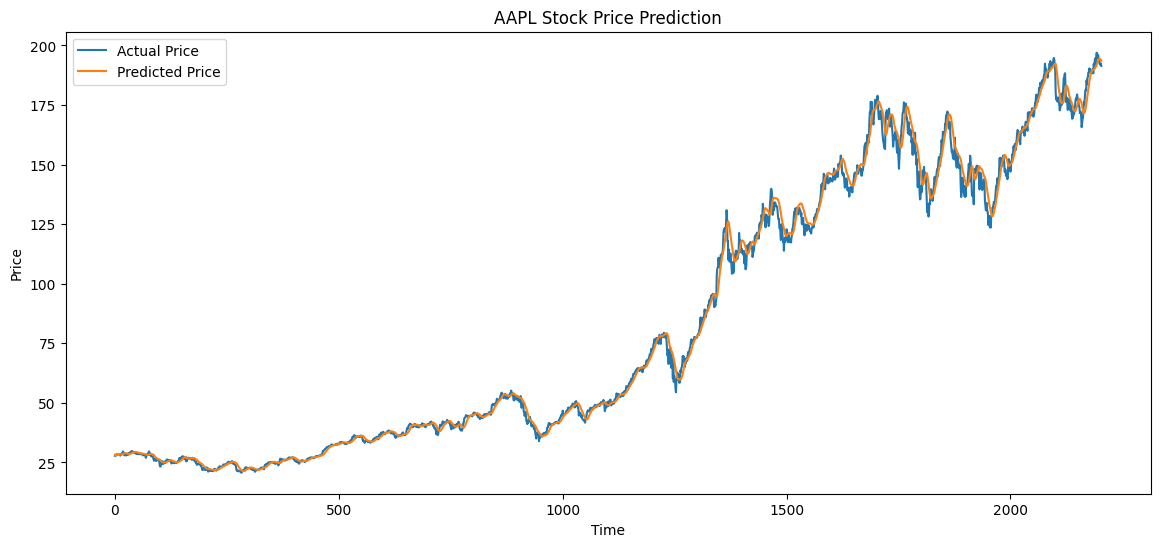

In [6]:
# Predict
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()